In [ ]:
import os

In [ ]:
#using GTZAN dataset
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
cd '/content/drive/My Drive/Grad-Spring/ITCS-5156/'

/content/drive/My Drive/Grad-Spring/ITCS-5156


In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

# path to json file that stores MFCCs and genre labels for each processed segment
DATA_PATH = "/content/drive/My Drive/Grad-Spring/ITCS-5156/data_10.json"

def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [ ]:
# load data
X, y = load_data(DATA_PATH)

# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Data succesfully loaded!
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
219/219 [=

In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/50
219/219 [==============================] - 3s 7ms/step - loss: 0.1127 - accuracy: 0.9641 - val_loss: 3.0508 - val_accuracy: 0.5841
Epoch 2/50
219/219 [==============================] - 1s 6ms/step - loss: 0.1365 - accuracy: 0.9575 - val_loss: 2.9123 - val_accuracy: 0.5935
Epoch 3/50
219/219 [==============================] - 1s 6ms/step - loss: 0.0759 - accuracy: 0.9735 - val_loss: 3.0177 - val_accuracy: 0.5908
Epoch 4/50
219/219 [==============================] - 1s 5ms/step - loss: 0.0548 - accuracy: 0.9834 - val_loss: 2.9015 - val_accuracy: 0.6048
Epoch 5/50
219/219 [==============================] - 1s 5ms/step - loss: 0.0744 - accuracy: 0.9763 - val_loss: 2.9841 - val_accuracy: 0.5878
Epoch 6/50
219/219 [==============================] - 1s 5ms/step - loss: 0.1355 - accuracy: 0.9557 - val_loss: 3.5275 - val_accuracy: 0.5524
Epoch 7/50
219/219 [==============================] - 1s 5ms/step - loss: 0.1651 - accuracy: 0.9506 - val_loss: 3.1517 - val_accuracy: 0.5831
Epoch 

In [ ]:

import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math

In [ ]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

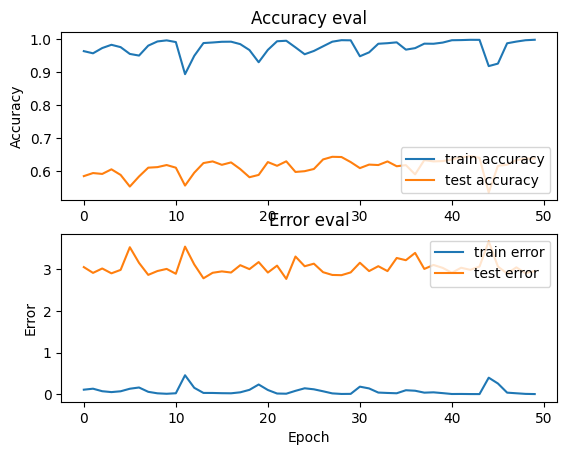

In [ ]:

# plot accuracy and error as a function of the epochs
plot_history(history)

In [ ]:
# build network topology
model_regularized = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model_regularized.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
219/219 [==============================] - 3s 6ms/step - loss: 21.6736 - accuracy: 0.1249 - val_loss: 3.5215 - val_accuracy: 0.0858
Epoch 2/100
219/219 [==============================] - 1s 5ms/step - loss: 5.5209 - accuracy: 0.1207 - val_loss: 3.5105 - val_accuracy: 0.1091
Epoch 3/100
219/219 [==============================] - 1s 5ms/step - loss: 4.1881 - accuracy: 0.1196 - val_loss: 3.5081 - val_accuracy: 0.1058
Epoch 4/100
219/219 [==============================] - 2s 8ms/step - loss: 3.8177 - accuracy: 0.1133 - val_loss: 3.5051 - val_accuracy: 0.1051
Epoch 5/100
219/219 [==============================] - 2s 9ms/step - loss: 3.7507 - accuracy: 0.1053 - val_loss: 3.4970 - val_accuracy: 0.1095
Epoch 6/100
219/219 [==============================] - 1s 5ms/step - loss: 3.6311 - accuracy: 0.1205 - val_loss: 3.4792 - val_accuracy: 0.1145
Epoch 7/100
219/219 [==============================] - 1s 5ms/step - loss: 3.5679 - accuracy: 0.1183 - val_loss: 3.4615 - val_accuracy: 0.124

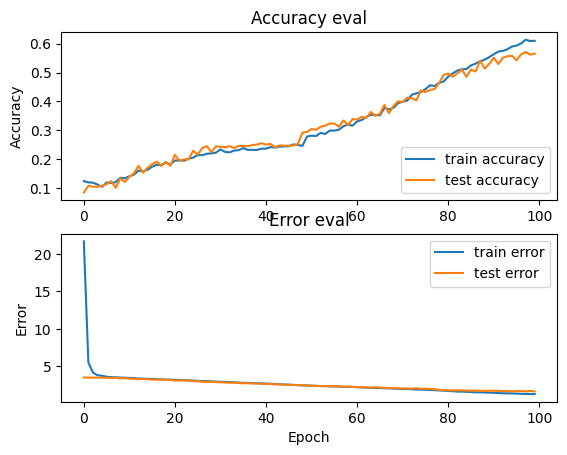

In [ ]:
plot_history(history)

In [ ]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
X_train.shape

(5991, 130, 13, 1)

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [ ]:
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 6, 32)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 6, 32)        128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 2, 32)        0         
 2D)                                                             
                                                      

In [ ]:
# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

Epoch 1/50
188/188 [==============================] - 12s 8ms/step - loss: 2.3805 - accuracy: 0.2330 - val_loss: 1.7970 - val_accuracy: 0.3618
Epoch 2/50
188/188 [==============================] - 1s 5ms/step - loss: 1.8549 - accuracy: 0.3562 - val_loss: 1.5456 - val_accuracy: 0.4539
Epoch 3/50
188/188 [==============================] - 1s 6ms/step - loss: 1.6657 - accuracy: 0.4123 - val_loss: 1.4226 - val_accuracy: 0.4940
Epoch 4/50
188/188 [==============================] - 1s 6ms/step - loss: 1.5475 - accuracy: 0.4447 - val_loss: 1.3599 - val_accuracy: 0.5060
Epoch 5/50
188/188 [==============================] - 1s 5ms/step - loss: 1.4358 - accuracy: 0.4839 - val_loss: 1.3055 - val_accuracy: 0.5274
Epoch 6/50
188/188 [==============================] - 1s 5ms/step - loss: 1.3883 - accuracy: 0.5028 - val_loss: 1.2375 - val_accuracy: 0.5641
Epoch 7/50
188/188 [==============================] - 1s 5ms/step - loss: 1.3338 - accuracy: 0.5216 - val_loss: 1.2058 - val_accuracy: 0.5754
Epoch

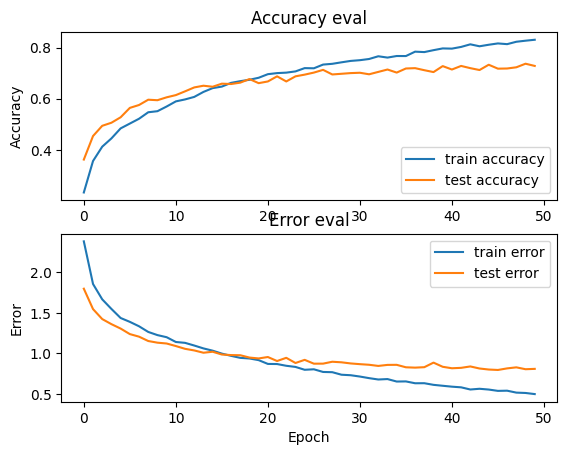

In [ ]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [ ]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 0s - loss: 0.7931 - accuracy: 0.7305 - 278ms/epoch - 4ms/step

Test accuracy: 0.7304765582084656


In [ ]:
model_cnn.save("Music_Genre_10_CNN")

In [ ]:

model_cnn.save("Music_Genre_10_CNN.h5")

In [ ]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("Music_Genre_10_CNN.h5")

In [ ]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

In [ ]:
X_to_predict.shape

(130, 13, 1)

In [ ]:

print("Real Genre:", y_to_predict)

Real Genre: 7


In [ ]:

# add a dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)

In [ ]:

X_to_predict.shape

(1, 130, 13, 1)

In [ ]:

# perform prediction
prediction = model_cnn.predict(X_to_predict)

1/1 [==============================] - 0s 187ms/step


In [ ]:


# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Predicted Genre: 7


In [ ]:
# pick a sample to predict from the test set
X_to_predict = X_test[50]
y_to_predict = y_test[50]

print("Real Genre:", y_to_predict)

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Real Genre: 6
1/1 [==============================] - 0s 36ms/step
Predicted Genre: 8


In [ ]:
len(X_test)

2497

In [ ]:
for n in range(10):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))


Real Genre: 2
1/1 [==============================] - 0s 30ms/step
Predicted Genre: 9

Real Genre: 0
1/1 [==============================] - 0s 31ms/step
Predicted Genre: 3

Real Genre: 2
1/1 [==============================] - 0s 27ms/step
Predicted Genre: 2

Real Genre: 9
1/1 [==============================] - 0s 30ms/step
Predicted Genre: 9

Real Genre: 9
1/1 [==============================] - 0s 39ms/step
Predicted Genre: 9

Real Genre: 6
1/1 [==============================] - 0s 26ms/step
Predicted Genre: 3

Real Genre: 5
1/1 [==============================] - 0s 26ms/step
Predicted Genre: 3

Real Genre: 1
1/1 [==============================] - 0s 25ms/step
Predicted Genre: 1

Real Genre: 7
1/1 [==============================] - 0s 27ms/step
Predicted Genre: 7

Real Genre: 3
1/1 [==============================] - 0s 27ms/step
Predicted Genre: 3


In [ ]:
# Audio files pre-processing
def process_input(audio_file, track_duration):

  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FTT=2048
  HOP_LENGTH=512
  TRACK_DURATION = track_duration # measured in seconds
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS = 10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)
  
  for d in range(10):

    # calculate start and finish sample for current segment
    start = samples_per_segment * d
    finish = start + samples_per_segment

    # extract mfcc
    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr = sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T

    return mfcc


In [ ]:
genre_dict = {0:"hiphop",1:"country",2:"jazz",3:"classical",4:"metal",5:"pop",6:"rock",7:"blues",8:"reggae",9:"disco"}
     

In [ ]:
new_input_mfcc = process_input("/content/drive/My Drive/Grad-Spring/ITCS-5156/Moonlight Sonata 1st Movement - Short Version (HD).mp3", 30)

In [ ]:

type(new_input_mfcc)

numpy.ndarray

In [ ]:
new_input_mfcc.shape

(130, 13)

In [ ]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape
     

(1, 130, 13, 1)

In [ ]:

prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])
     

1/1 [==============================] - 0s 26ms/step
Predicted Genre: pop


In [ ]:
new_input_mfcc = process_input("/content/drive/My Drive/Grad-Spring/ITCS-5156/Filmy Ghost (Sábila Orbe) - KD6-3.7.mp3", 30)

In [ ]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 130, 13, 1)

In [ ]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

1/1 [==============================] - 0s 19ms/step
Predicted Genre: pop
